In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
sys.path.pop(1)
sys.path.insert(0,'../')

In [2]:
import pyathena as pa

In [3]:
coolftn=pa.coolftn(fname='../pyathena/coolftn.p')

# Cooling function

* For original data in the code units, $P/\rho=c_s^2$. We define $T_1=m_H c_s^2/k_B$ is the temperature as if $\mu=1$.
* We tabulated $T$, $\Lambda(T)$, $\Gamma(T)$ as a function of $T_1$ using $\mu(T) = T/T_1$ and stored them to `coolftn.p`
* `class coolftn` loads the information from `coolftn.p` and provides methods to conversion from $T_1$ to $T$, $\Lambda$, and $\Gamma$

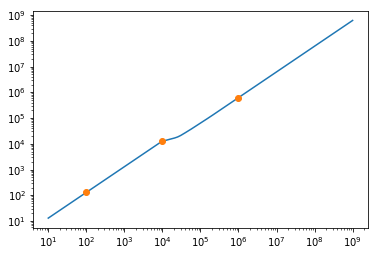

In [4]:
plt.loglog(coolftn.T1,coolftn.temp)
cs2=np.array([1.e2,1.e4,1.e6])
plt.loglog(cs2,coolftn.get_temp(cs2),'o')

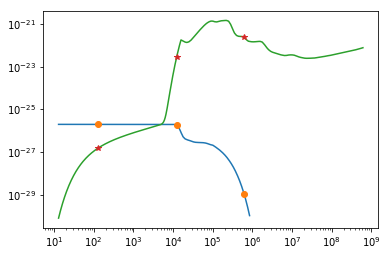

In [5]:
plt.loglog(coolftn.temp,coolftn.heat)
plt.loglog(coolftn.get_temp(cs2),coolftn.get_heat(cs2),'o')
plt.loglog(coolftn.temp,coolftn.cool)
plt.loglog(coolftn.get_temp(cs2),coolftn.get_cool(cs2),'*')


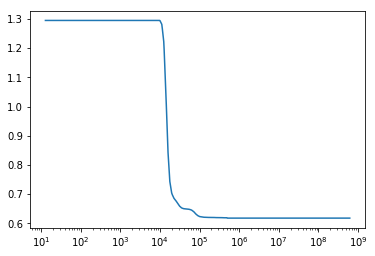

In [6]:
mu=coolftn.temp/coolftn.T1
plt.semilogx(coolftn.temp,mu)

(1e-29, 1e-25)

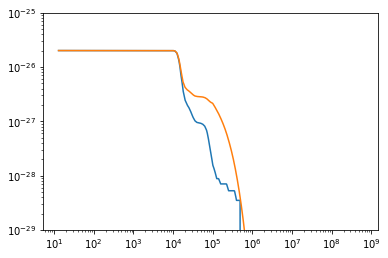

In [7]:
plt.loglog(coolftn.temp,(mu-mu.min())/(mu.max()-mu.min())*coolftn.heat[0])
plt.loglog(coolftn.temp,coolftn.heat)
plt.ylim(1.e-29,1.e-25)

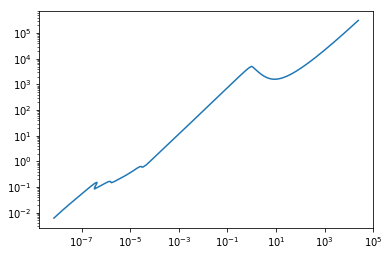

In [8]:
nden=coolftn.heat/coolftn.cool
plt.loglog(nden,coolftn.temp*nden)